# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2021
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 8 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook (colab):

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

## Важно

Перед отправкой проверьте, что весь ваш код выполняется без ошибок, если во время проверки после последовательного перезапуска ячеек что-то пойдет не так, то задание может быть оценено в 0 баллов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.4)
%matplotlib inline
%config InlineBackend.figure_format="retina"  # only for retina display

Зафиксируем `seed` для воспроизводимости.

In [2]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [3]:
N = 1e4  # use this

theta = 10

# YOUR CODE GOES HERE
sample = sps.uniform(0, theta).rvs(size=int(N))
sample

array([3.74540119, 9.50714306, 7.31993942, ..., 9.46707915, 3.97487992,
       2.17140404])

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [4]:
# YOUR CODE GOES HERE
# 2mean(x)
def evaluation_theta1(sample):
    evaluation = 2 * np.cumsum(sample) / (np.arange(N) + 1)
    return evaluation

# mean(x) + x_(n)/2
def evaluation_theta2(sample):
    evaluation = np.cumsum(sample) / (np.arange(N) + 1) + np.maximum.accumulate(sample) / 2
    return evaluation

# (n+1) * min(x)
def evaluation_theta3(sample):
    evaluation = (np.arange(N) + 2) * np.minimum.accumulate(sample)
    return evaluation

# min(x) + max(x)
def evaluation_theta4(sample):
    evaluation = np.minimum.accumulate(sample) + np.maximum.accumulate(sample)
    return evaluation
evaluation_theta4(sample)

# (n+1) / n * max(x)
def evaluation_theta5(sample):
    evaluation = (np.arange(N) + 2) * np.maximum.accumulate(sample) / (np.arange(N) + 1)
    return evaluation

In [5]:
def PrintAllGraphics(theta, size):
    # YOUR CODE GOES HERE

    x = np.arange(N) + 1
    plt.figure(figsize=size)
    plt.plot(
        x, 
        abs(evaluation_theta1(sample) - theta), 
        color='red', 
        linewidth=2.5, 
        label='$2\overline{X}$'
    ) 
    plt.plot(
        x, 
        abs(evaluation_theta2(sample) - theta), 
        color='green', 
        linewidth=2.5, 
        label='$\overline{X} + X_{(n)}$'
    ) 
    plt.plot(
        x, 
        abs(evaluation_theta4(sample) - theta), 
        color='yellow', 
        linewidth=2.5, 
        label='$X_{(1)} + X_{(n)}$'
    ) 
    plt.plot(
        x, 
        abs(evaluation_theta5(sample) - theta), 
        color='purple', 
        linewidth=2.5, 
        label='$\dfrac{n+1}{n}X_{(n)}$'
    ) 

    plt.legend()
    plt.xlim((1, N))
    plt.ylim((0, 0.4))
    plt.xlabel('N')
    plt.title("delta(N) = $\hat{\\theta}(N) - \\theta$")
    plt.show()


Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки лучше соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

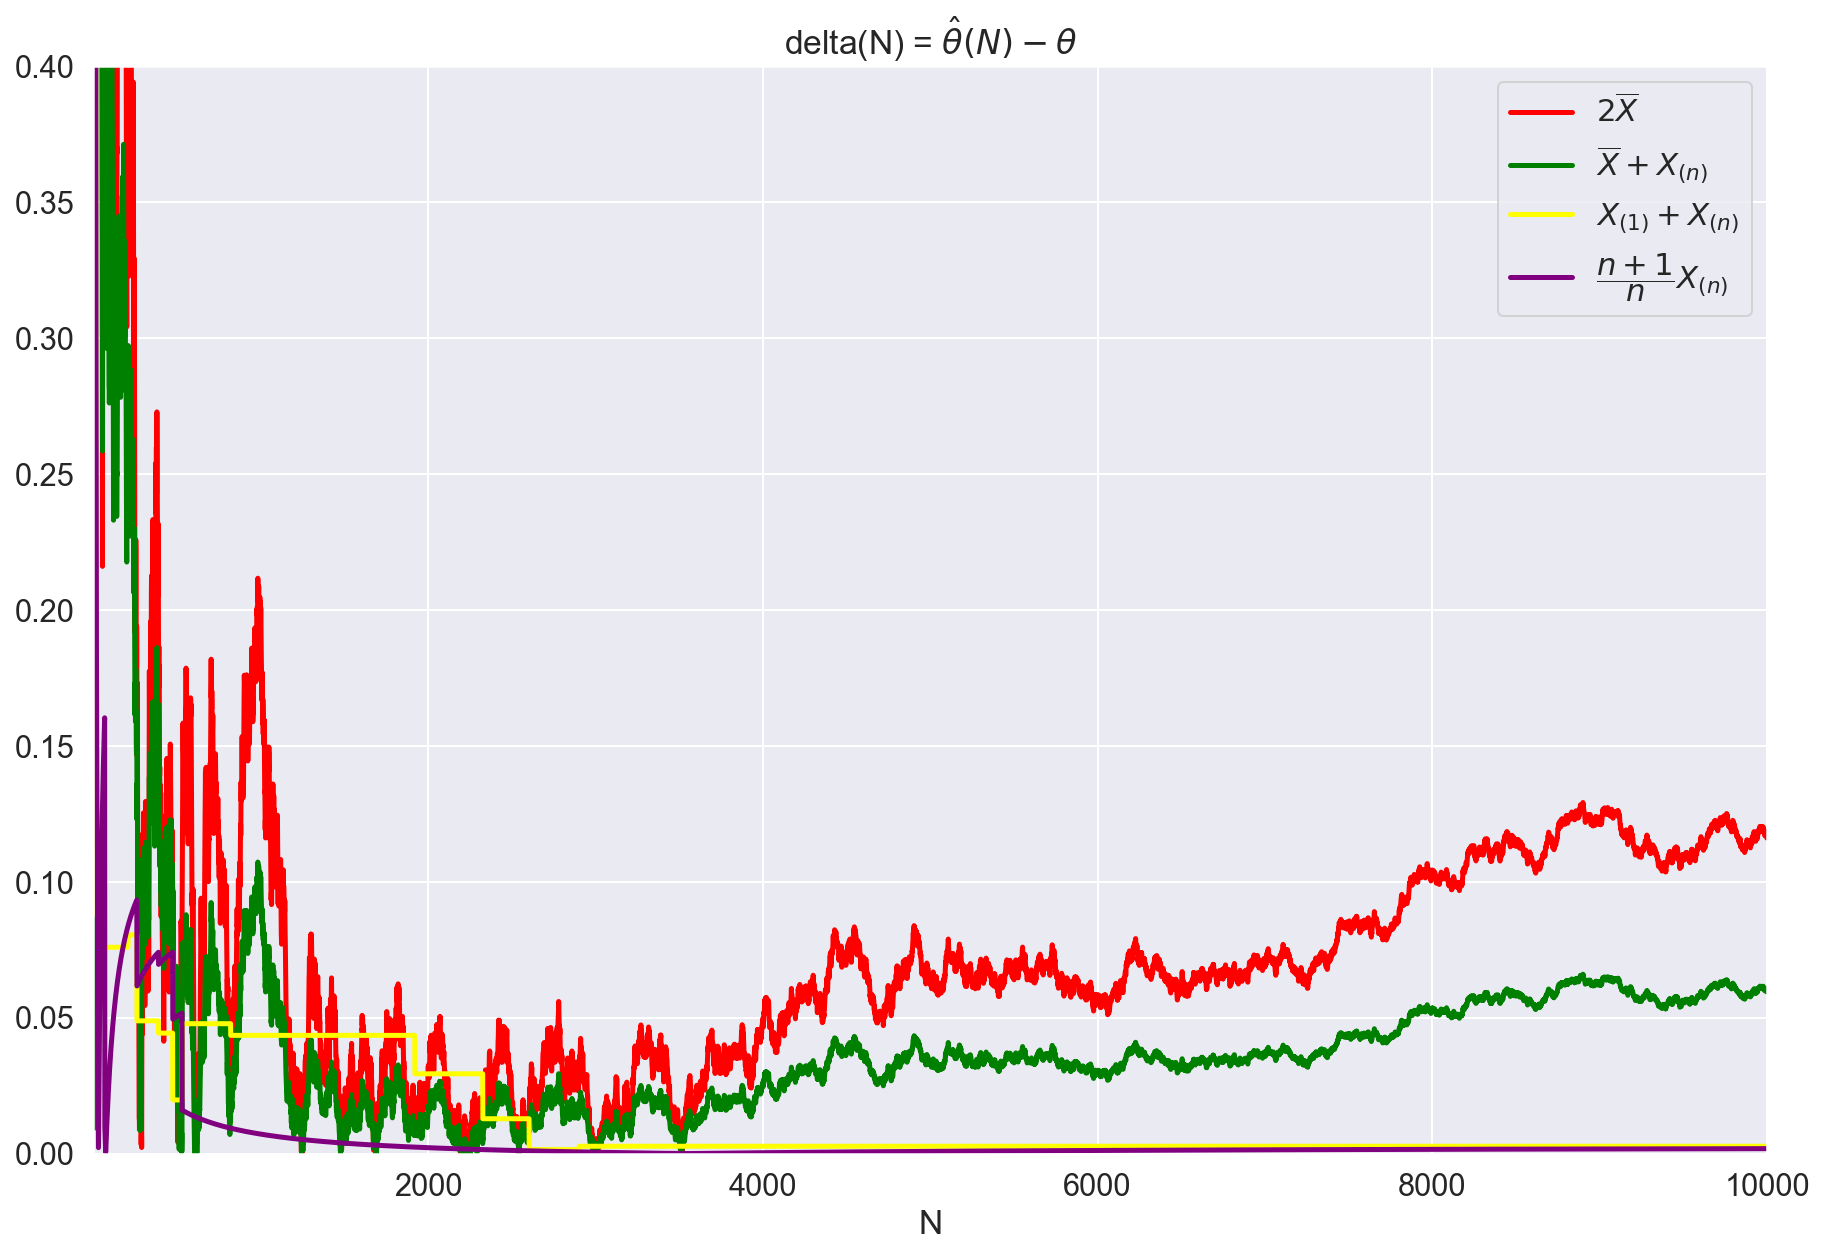

In [6]:
PrintAllGraphics(theta, (15, 10))

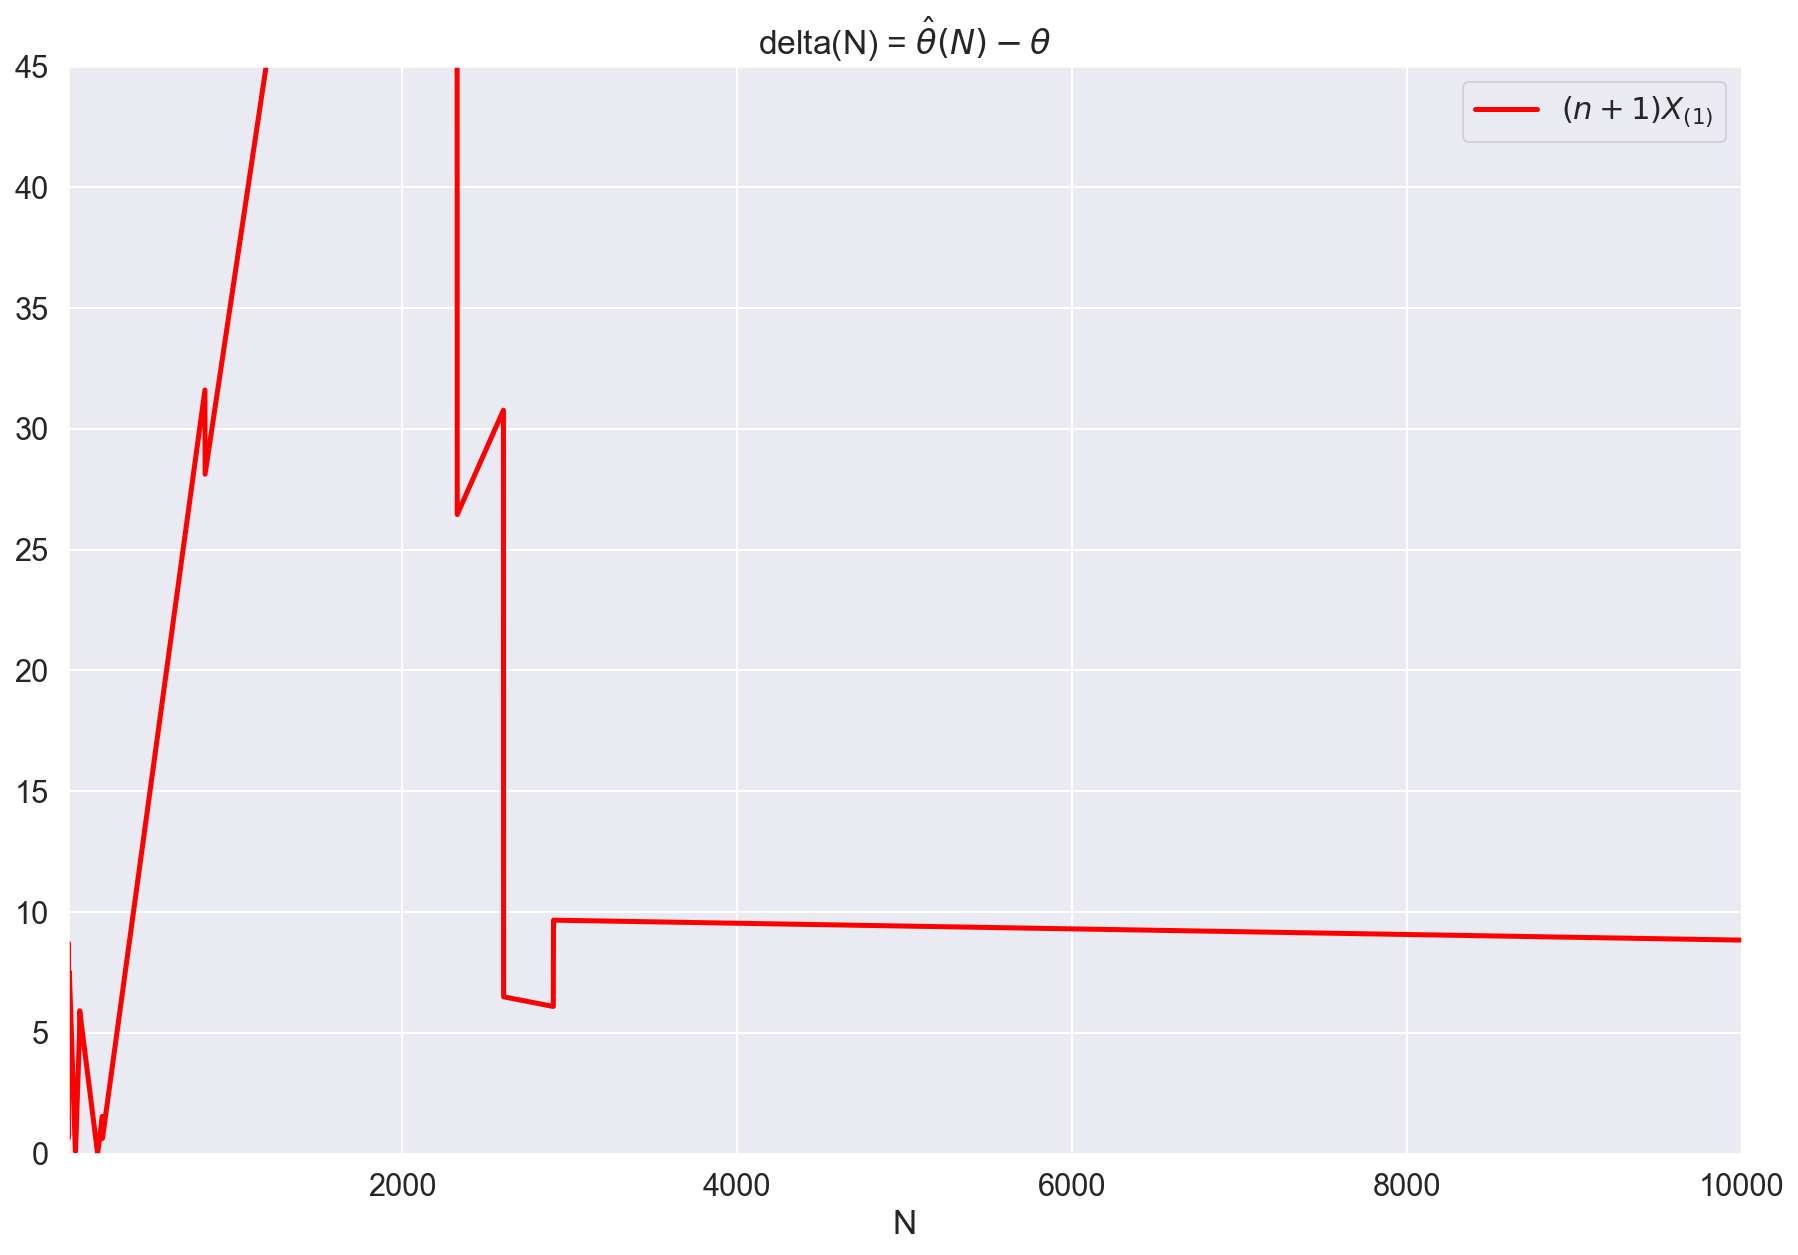

In [7]:
# YOUR CODE GOES HERE

x = np.arange(N) + 1
plt.figure(figsize=(15, 10))
plt.plot(
    x, 
    abs(evaluation_theta3(sample) - theta), 
    color='red', 
    linewidth=2.5, 
    label='$(n+1) X_{(1)}$'
) 

plt.legend()
plt.xlim((1, N))
plt.ylim((0, 45))
plt.xlabel('N')
plt.title("delta(N) = $\hat{\\theta}(N) - \\theta$")
plt.show()


Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ 

Лучшая оценка получилась $\frac{n+1}{n} X_{(n)}$. Это хорошо видно из графиков. Также можно заметить, что оценка $(n+1)X_{(1)}$ не сходится к истинной (так как эта оценка не состоятельная).

Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

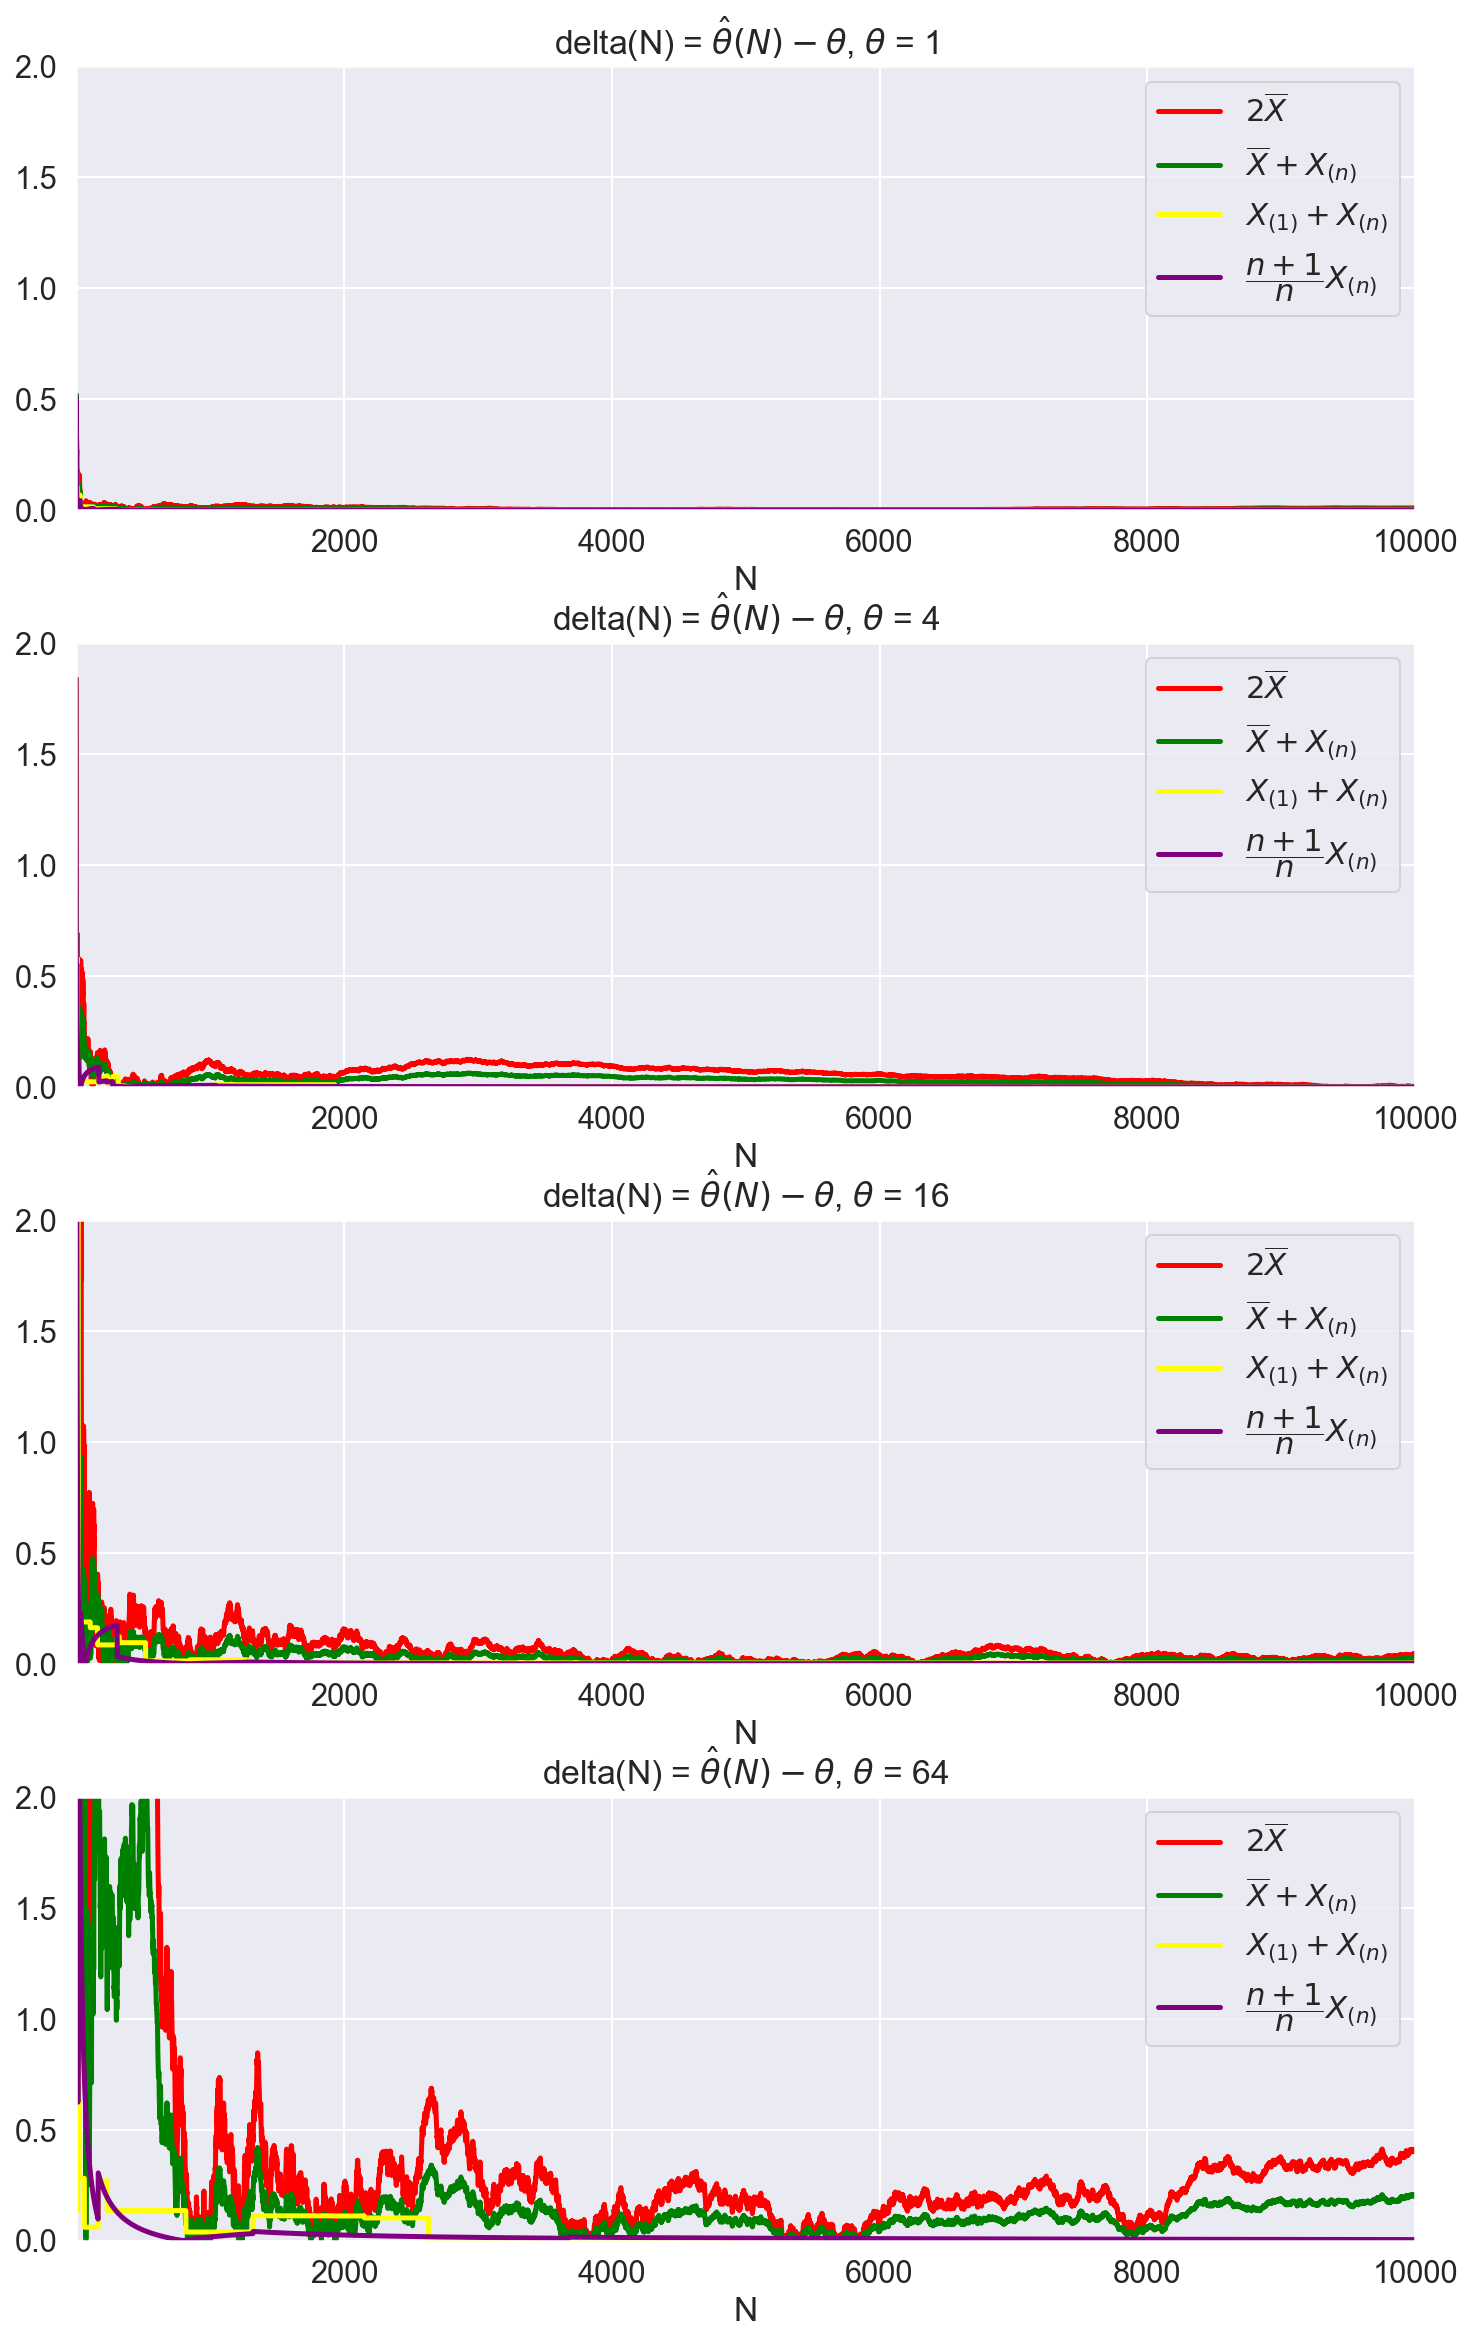

In [8]:
# YOUR CODE GOES HERE

thetas = [1, 4, 16, 64]
x = np.arange(N) + 1

plt.figure(figsize=(12, 20))


for ind, theta in zip(np.arange(4), thetas):
    # ind = 0
    sample = sps.uniform(0, theta).rvs(size=int(N))
    plt.subplot(4, 1, ind + 1)
    plt.plot(
        x, 
        abs(evaluation_theta1(sample) - theta),
        color='red', 
        linewidth=2.5, 
        label='$2\overline{X}$'
    )

    plt.plot(
        x, 
        abs(evaluation_theta2(sample) - theta), 
        color='green', 
        linewidth=2.5, 
        label='$\overline{X} + X_{(n)}$'
    )

    plt.plot(
        x, 
        abs(evaluation_theta4(sample) - theta), 
        color='yellow', 
        linewidth=2.5, 
        label='$X_{(1)} + X_{(n)}$'
    ) 

    plt.plot(
        x, 
        abs(evaluation_theta5(sample) - theta), 
        color='purple', 
        linewidth=2.5, 
        label='$\dfrac{n+1}{n}X_{(n)}$'
    ) 

    plt.legend()
    plt.xlim((1, N))
    plt.ylim((0, 2))
    plt.xlabel('N')
    plt.title("delta(N) = $\hat{\\theta}(N) - \\theta$, $\\theta$ = " + str(theta))
    
plt.subplots_adjust(wspace=.2, hspace=.3)

Видно, что чем больше $\theta$, тем дольше delta стремится к нулю.

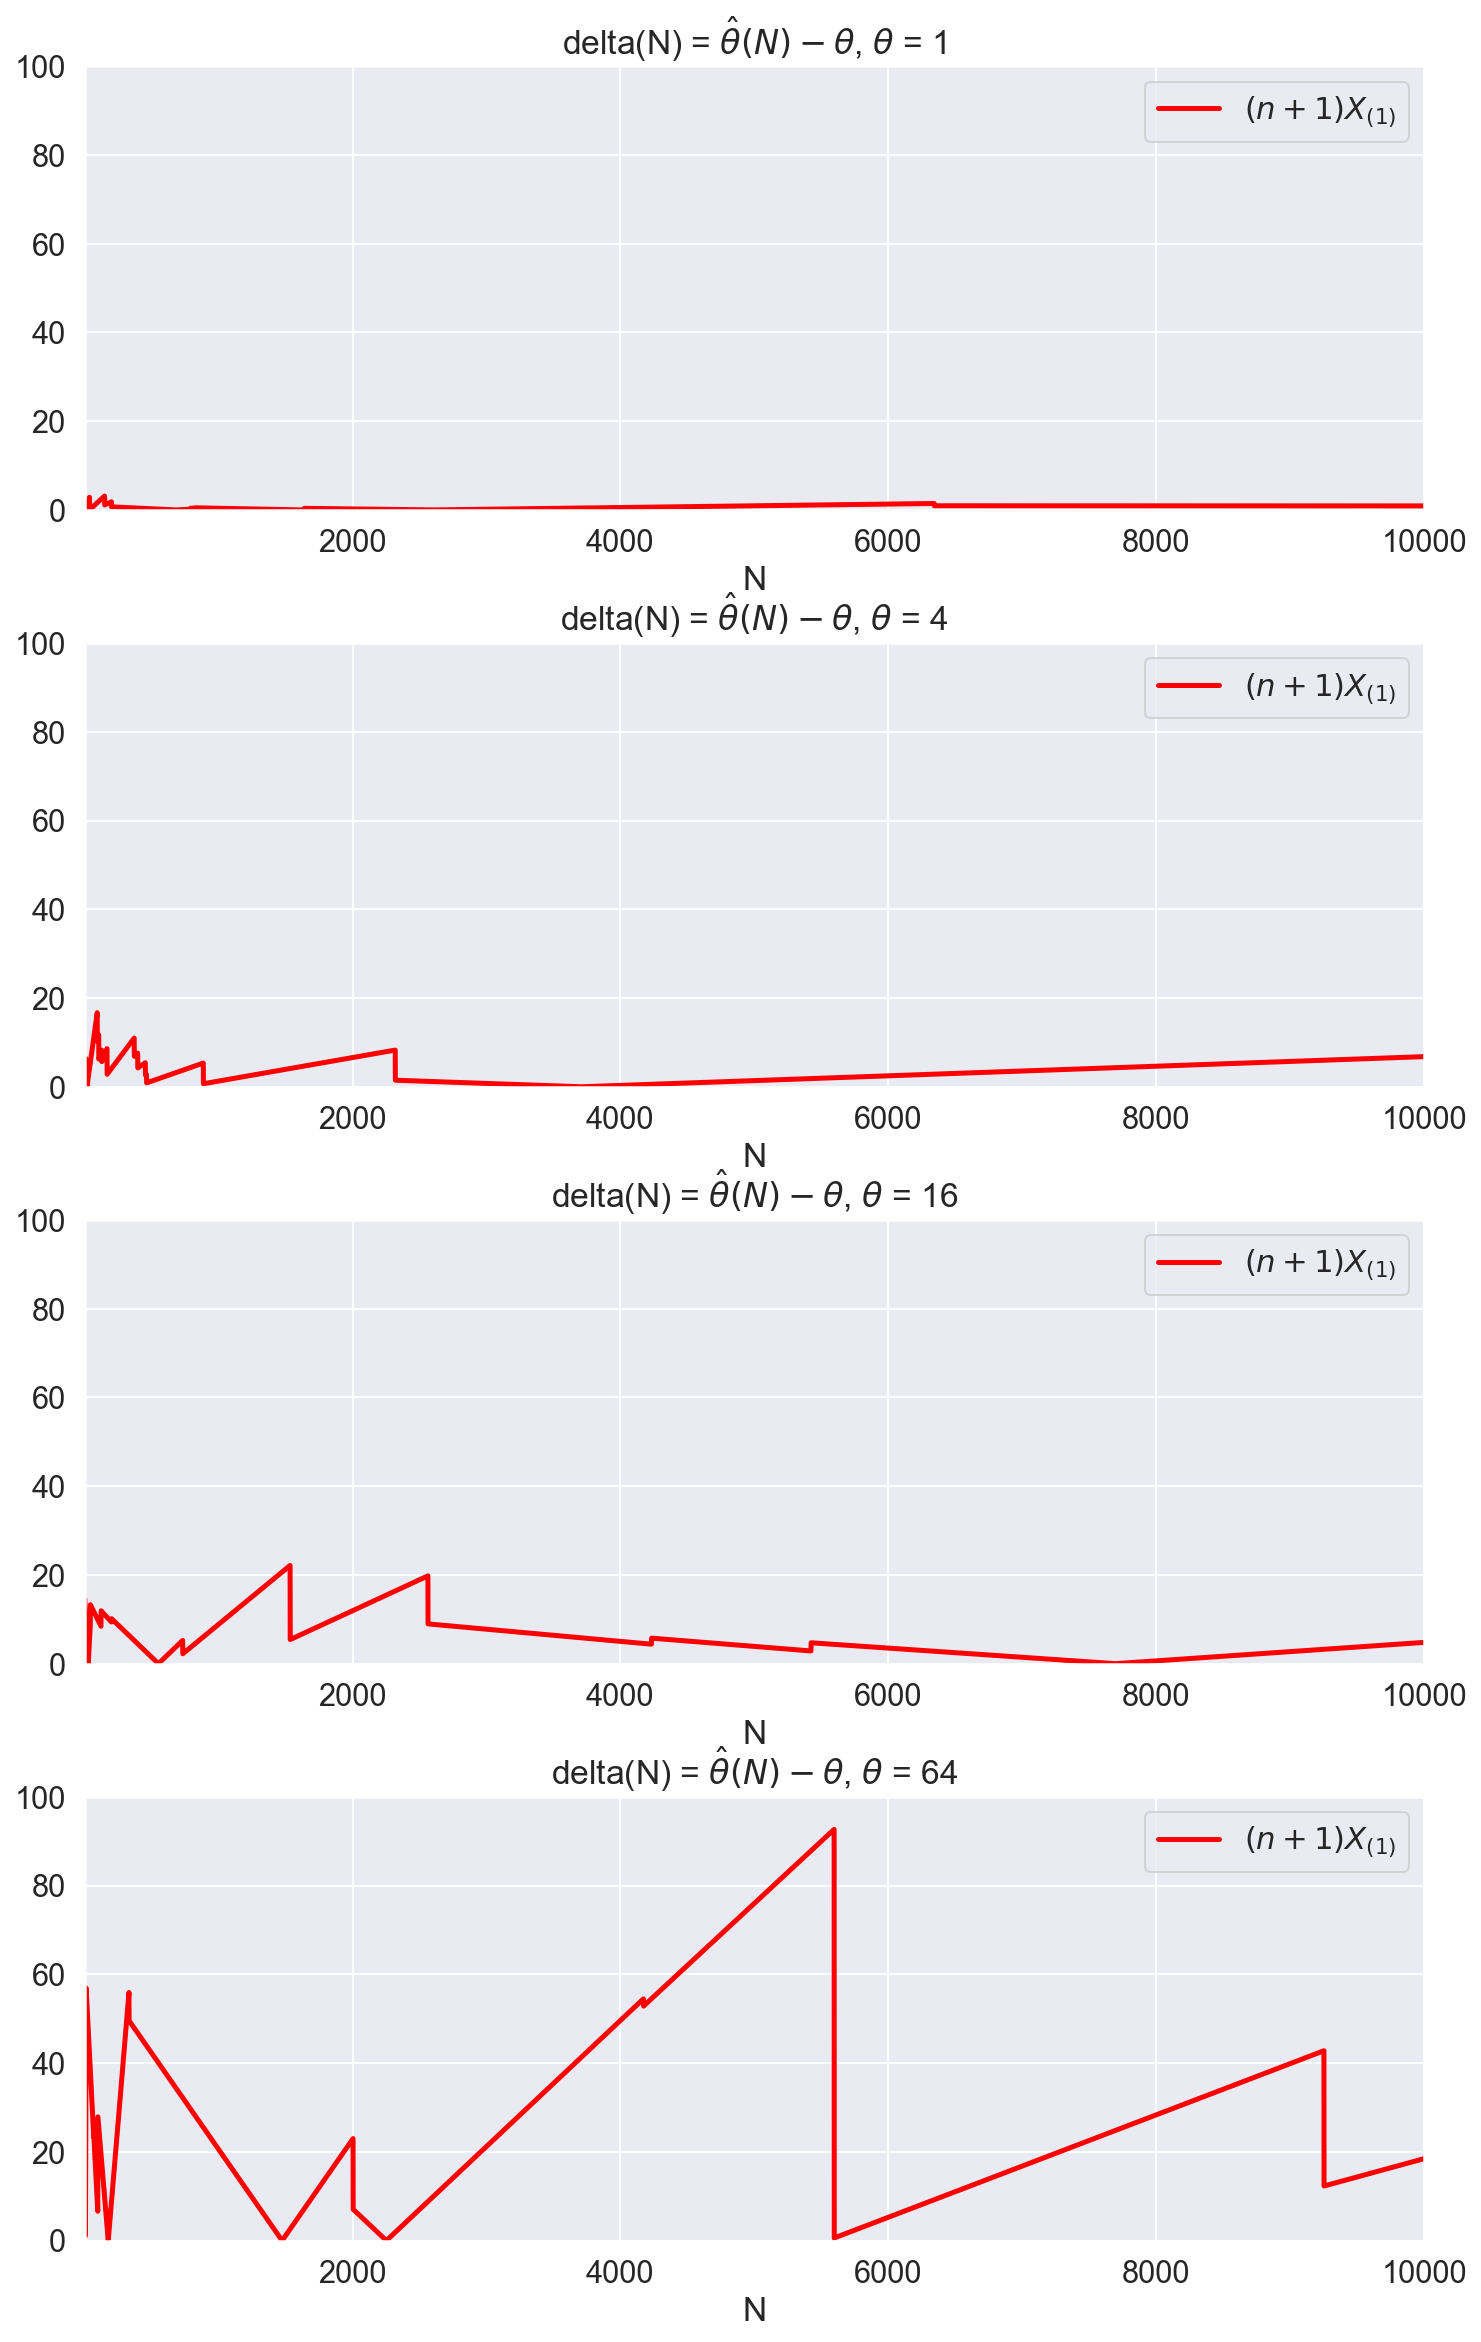

In [9]:
# YOUR CODE GOES HERE

thetas = [1, 4, 16, 64]
x = np.arange(N) + 1

plt.figure(figsize=(12, 20))


for ind, theta in zip(np.arange(4), thetas):
    # ind = 0
    sample = sps.uniform(0, theta).rvs(size=int(N))
    plt.subplot(4, 1, ind + 1)
    plt.plot(
        x, 
        abs(evaluation_theta3(sample) - theta),
        color='red', 
        linewidth=2.5, 
        label='$(n+1) X_{(1)}$'
    )


    plt.legend()
    plt.xlim((1, N))
    plt.ylim((0, 100))
    plt.xlabel('N')
    plt.title("delta(N) = $\hat{\\theta}(N) - \\theta$, $\\theta$ = " + str(theta))
    
plt.subplots_adjust(wspace=.2, hspace=.3)

Сделайте вывод.


__Вывод:__
Можно заметить, что оценки по лучшей сходимости к истинному значению идут так:
1. $\dfrac{n+1}{n}X_{(n)}$, $X_{(1)} + X_{(n)}$
2. $\overline{X} + X_{(n)}$
3. $2\overline{X}$
а оценка $(n+1) X_{(1)}$ вообще не состоятельная.

### Задача 2

Придумайте распределение, у которого конечны первые два момента, а третий – нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

In [10]:
# YOUR CODE GOES HERE

N = 10000

class MyGen(sps.rv_continuous):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    def _pdf(self, x):
        return 3 / (x ** 4)
    def _cdf(self, x):
        return (1 - 1 / (x ** 3))


my_gen = MyGen(a=1, name='my_gen')
sample = my_gen.rvs(size=N)

Очевидно, что $Ex = 1.5$, $Ex^2 = 3$, $Ex^n = \infty$ для $n \ge 3$.

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

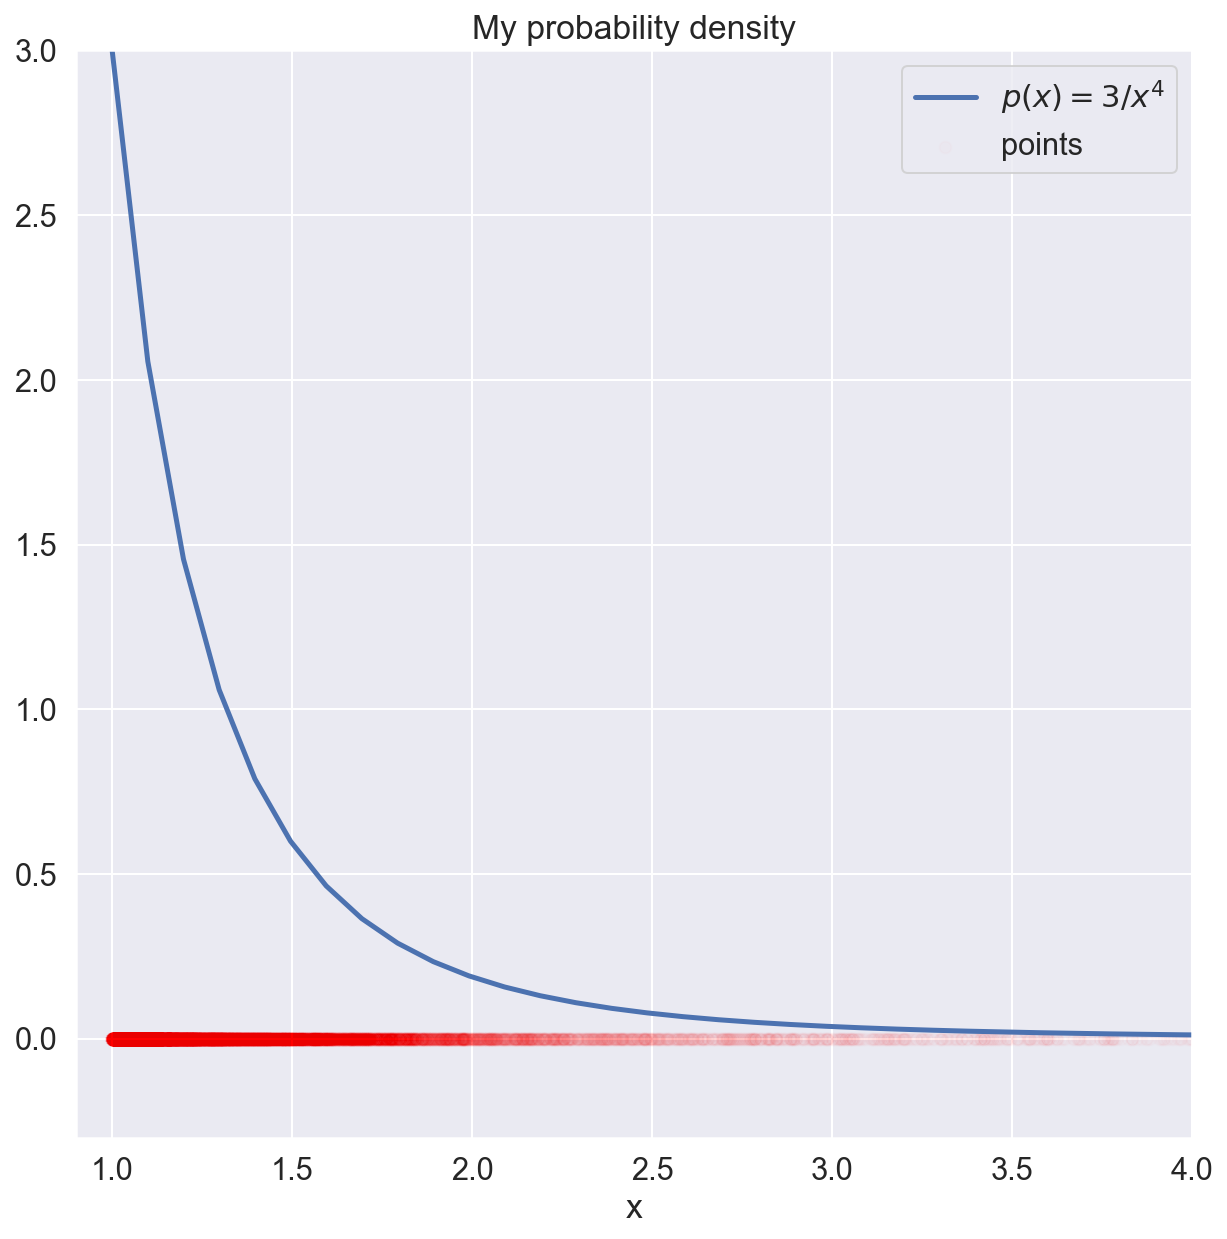

In [11]:
# YOUR CODE GOES HERE
x = np.linspace(1, 100, 1000)

plt.figure(figsize=(10, 10))

plt.plot(
    x,
    my_gen._pdf(x),
    linewidth=2.5,
    label='$p(x) = 3 / x^4$'
)

plt.scatter(
    sample,
    np.zeros(N),
    alpha=0.01,
    color='red',
    label='points'
)

plt.title('My probability density')
plt.legend()
plt.xlabel('x')
plt.xlim(0.9, 4)
plt.ylim(-0.3, 3)

plt.show()

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

In [12]:
# YOUR CODE GOES HERE
def evaluation_variance(sample):
    n = len(sample)
    xx = sample ** 2
    mean_xx = np.cumsum(xx) / (np.arange(n) + 1)
    mean_x = np.cumsum(sample) / (np.arange(n) + 1)
    return mean_xx - mean_x ** 2

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

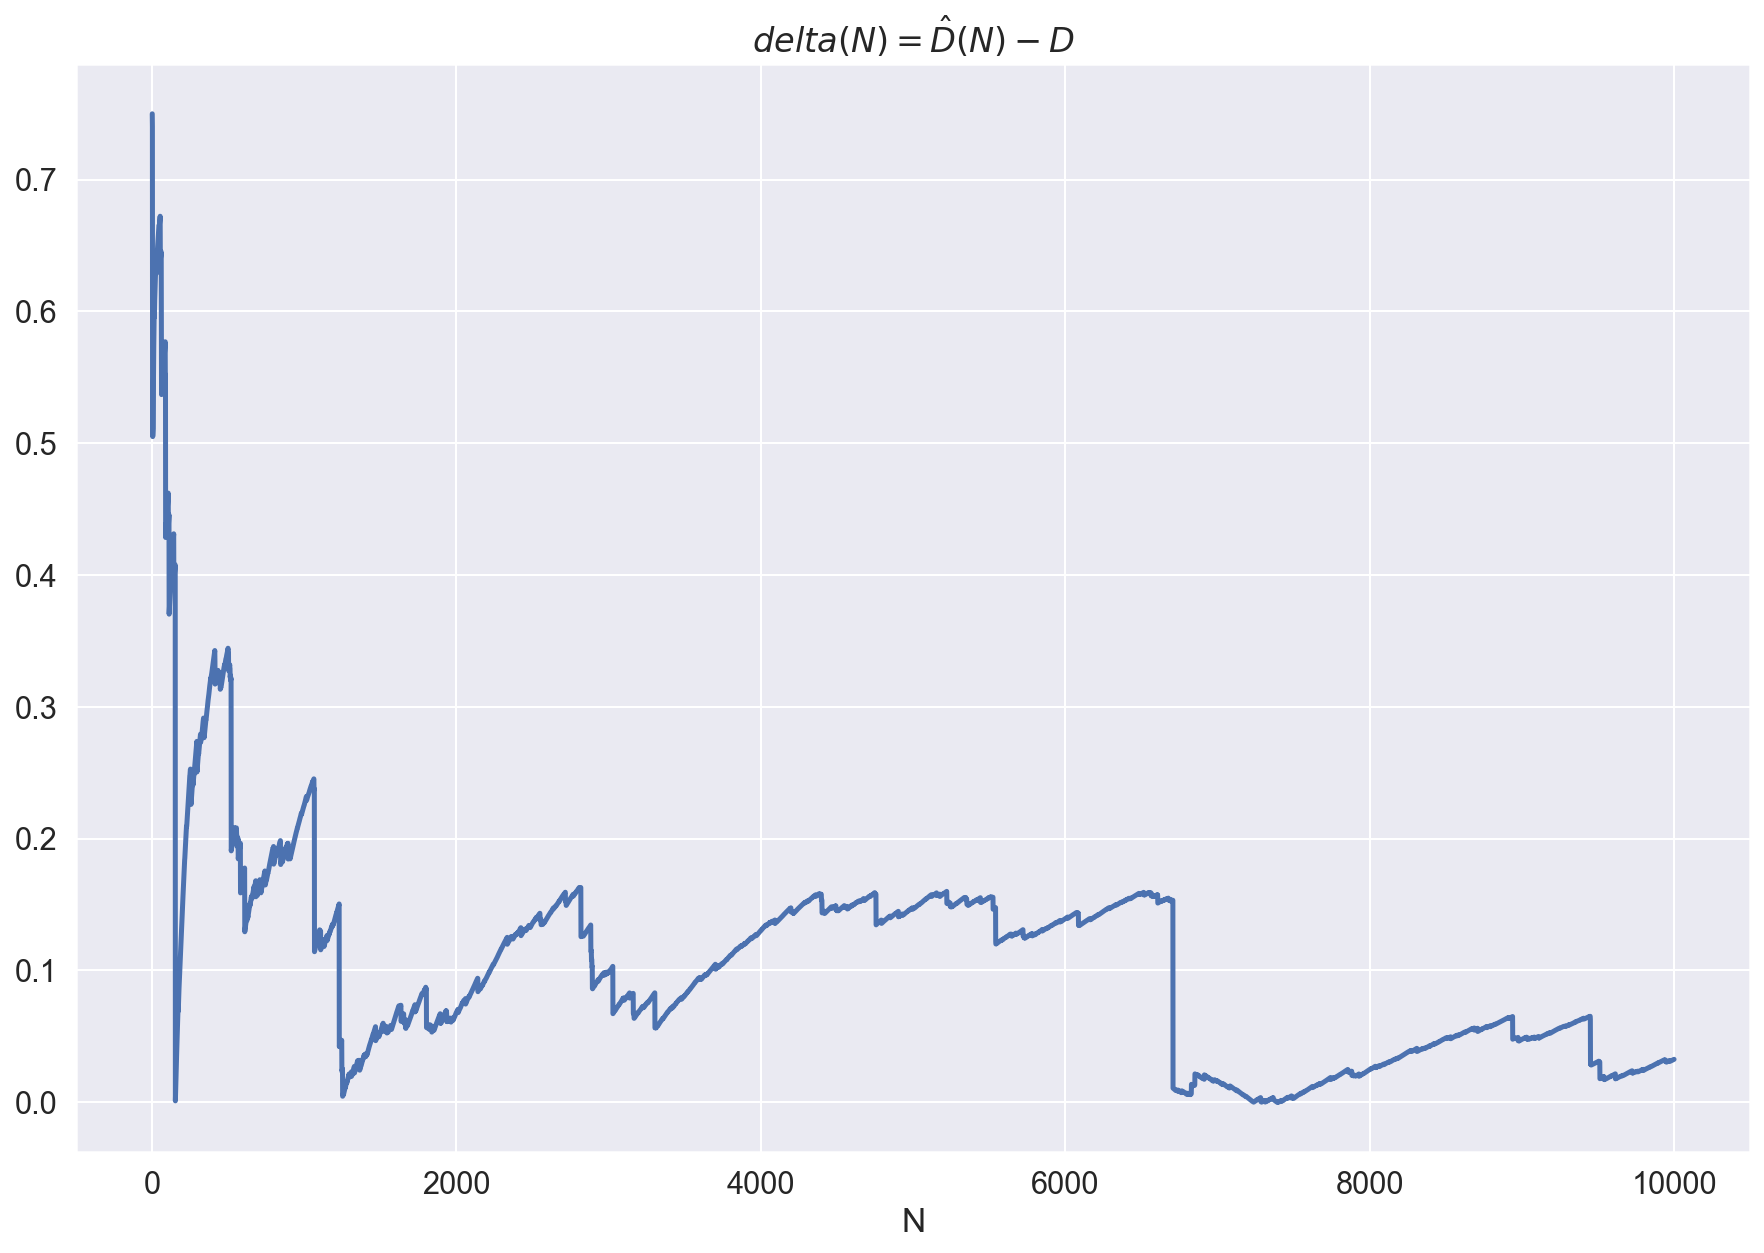

In [13]:
# YOUR CODE GOES HERE
variance = 0.75

plt.figure(figsize=(15, 10))


plt.plot(
    np.arange(N) + 1,
    abs(evaluation_variance(sample) - variance),
    linewidth=2.5,
)

plt.title('$delta(N) = \hat{D}(N) - D$')
plt.xlabel('N')

plt.show()

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


In [14]:
# YOUR CODE GOES HERE

sample = sps.cauchy.rvs(size=N)

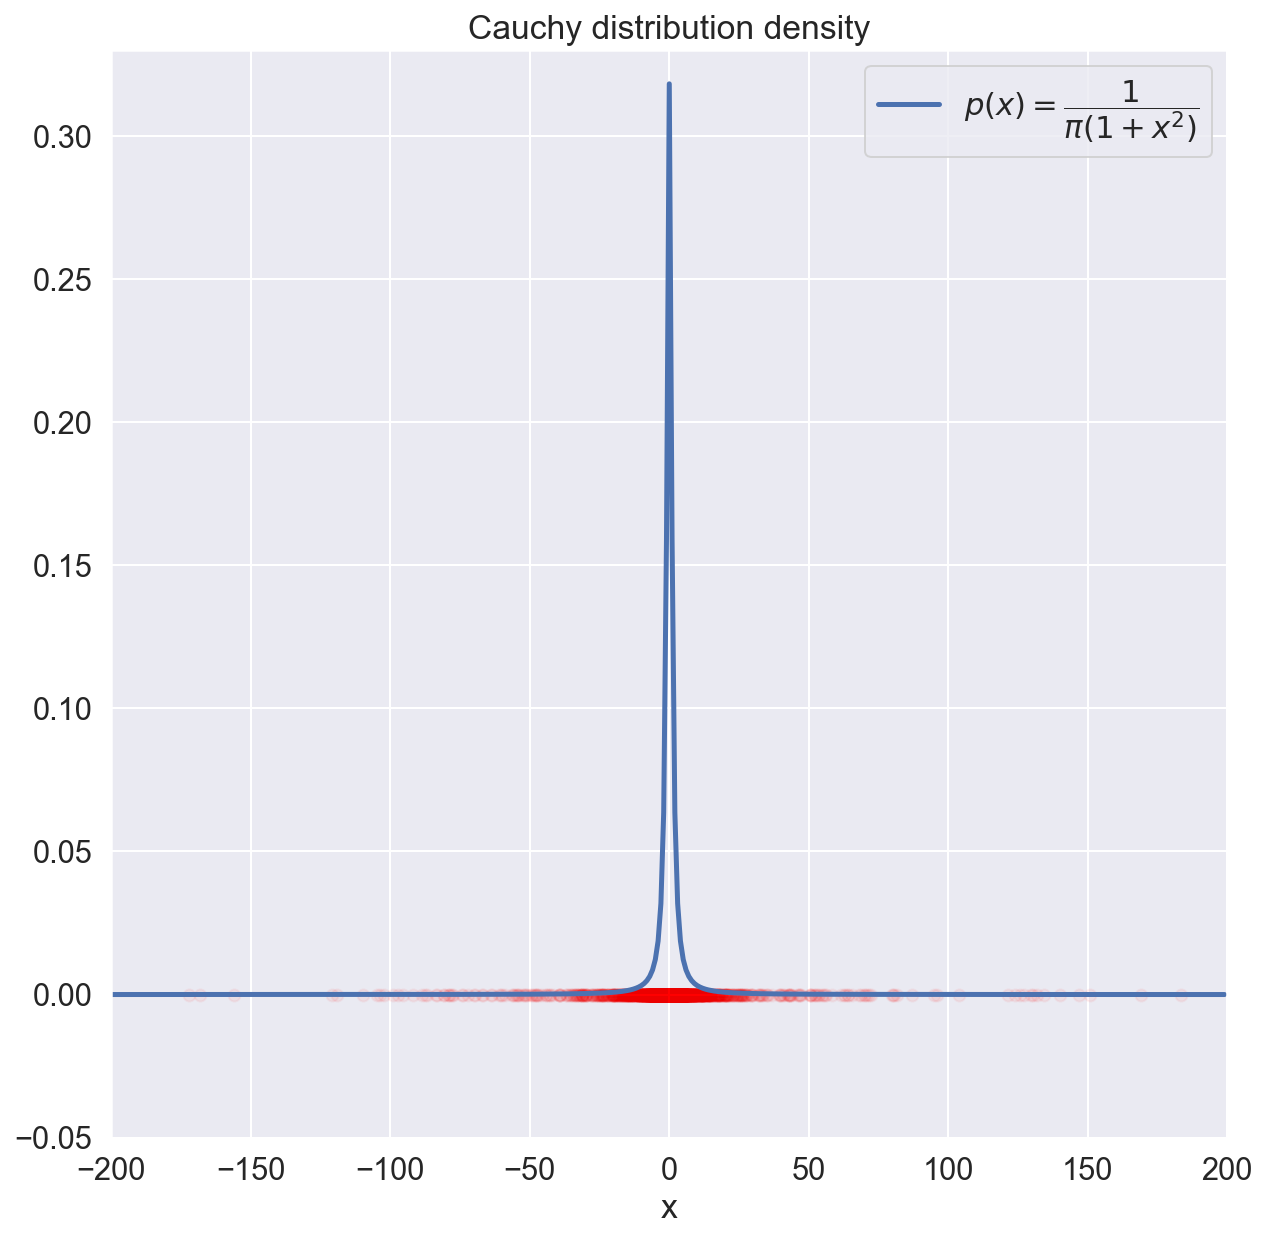

In [15]:
# YOUR CODE GOES HERE
# x = np.linspace(1, 100, 1000)
x = np.arange(-200, 200)

plt.figure(figsize=(10, 10))

plt.plot(
    x,
    sps.cauchy.pdf(x),
    linewidth=2.5,
    label='$p(x) = \dfrac{1}{\pi(1 + x^2)}$'
)

plt.scatter(
    sample,
    np.zeros(N),
    alpha=0.05,
    color='red'
)

plt.title('Cauchy distribution density')
plt.legend()
plt.xlabel('x')
plt.xlim(-200, 200)
plt.ylim(-0.05, 0.33)

plt.show()

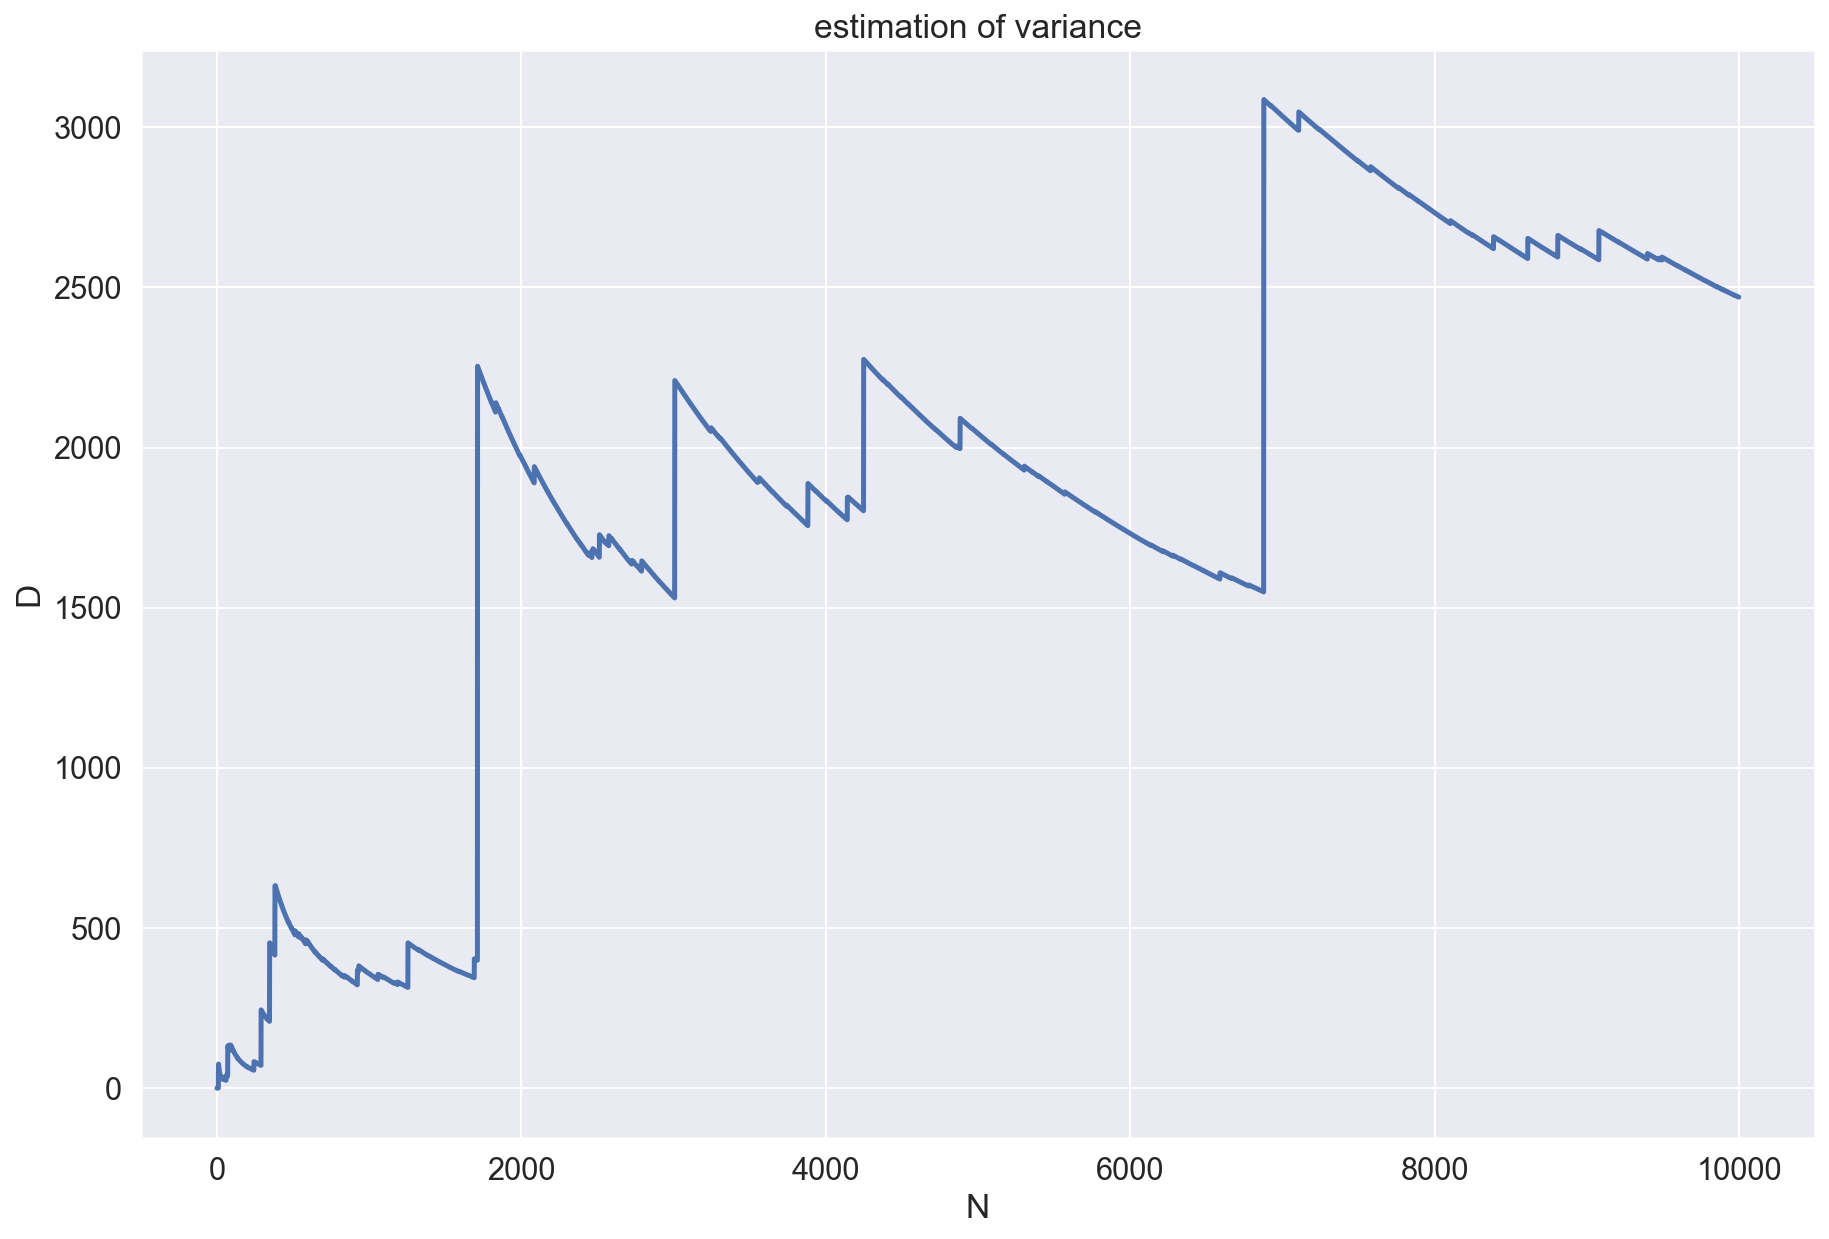

In [16]:
# YOUR CODE GOES HERE

x = np.arange(N)

plt.figure(figsize=(15, 10))


plt.plot(
    x,
    evaluation_variance(sample),
    linewidth=2.5,
)

plt.title('estimation of variance')
plt.xlabel('N')
plt.ylabel('D')

plt.show()

Получается, что оценка дисперсии всегда очень разная и нет никакой зависимости дисперсии от числа элементов в выборке.

### Задача 3

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [17]:
# YOUR CODE GOES HERE

N = 10000

sample = sps.norm.rvs(size=N)

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [18]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

# YOUR CODE GOES HERE

main_ecdf = ECDF(sample)

In [19]:
ecdfs = [ECDF(sample[:i]) for i in range(1, len(sample))]

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

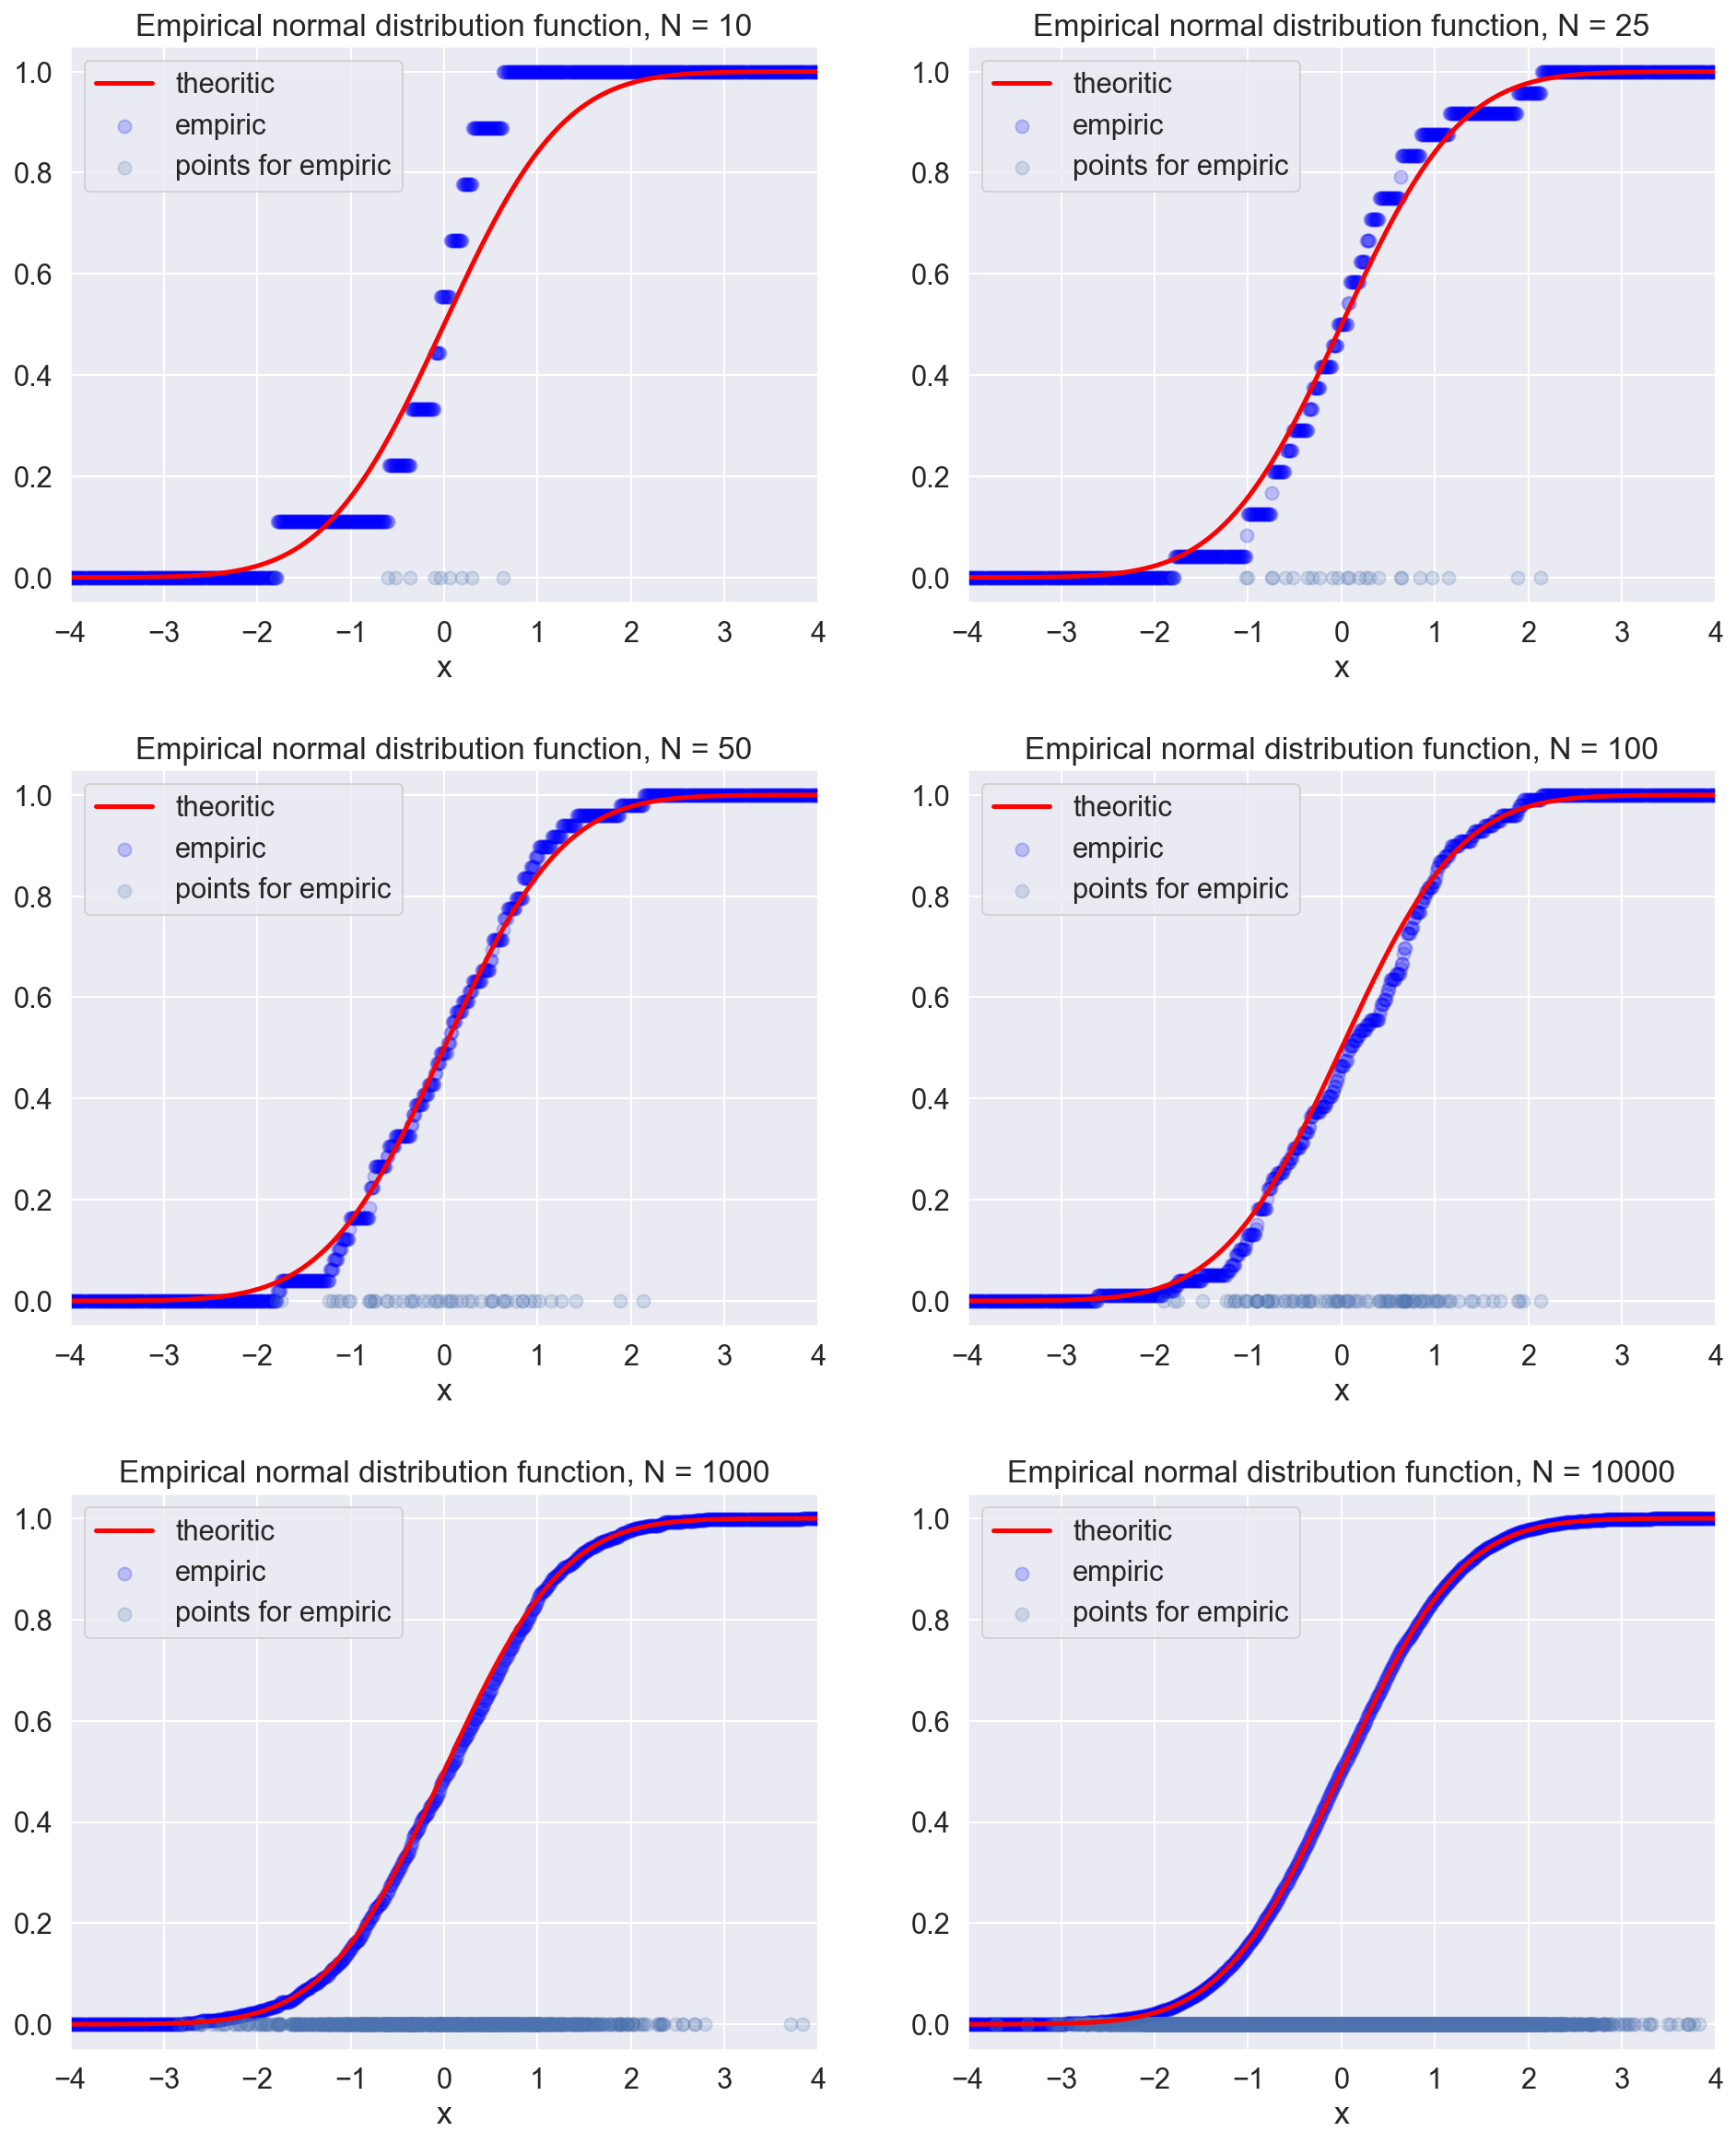

In [20]:
# YOUR CODE GOES HERE

examples = [10, 25, 50, 100, 1000, len(sample)]

x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(16, 20))


for ind, i in enumerate(examples):
    plt.subplot(3, 2, ind + 1)
    plt.scatter(
        x, 
        ecdfs[i-2](x),
        color='blue', 
        alpha=0.2,
        s=50, 
        label='empiric'
    )
    plt.scatter(
        sample[:i],
        np.zeros(i),
        alpha=0.2,
        s=50, 
        label='points for empiric'
    )
    plt.plot(
        x, 
        sps.norm.cdf(x),
        color='red', 
        linewidth=2.5,
        label='theoritic'
    )

    plt.legend()
    plt.xlim((-4, 4))
    plt.xlabel('x')
    plt.title('Empirical normal distribution function, N = ' + str(i))
    
plt.subplots_adjust(wspace=.2, hspace=.3)

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


In [21]:
# YOUR CODE GOES HERE
    
def D_n(n_array):
    return [max(abs(ecdfs[i](x) - sps.norm.cdf(x))) for i in n_array]

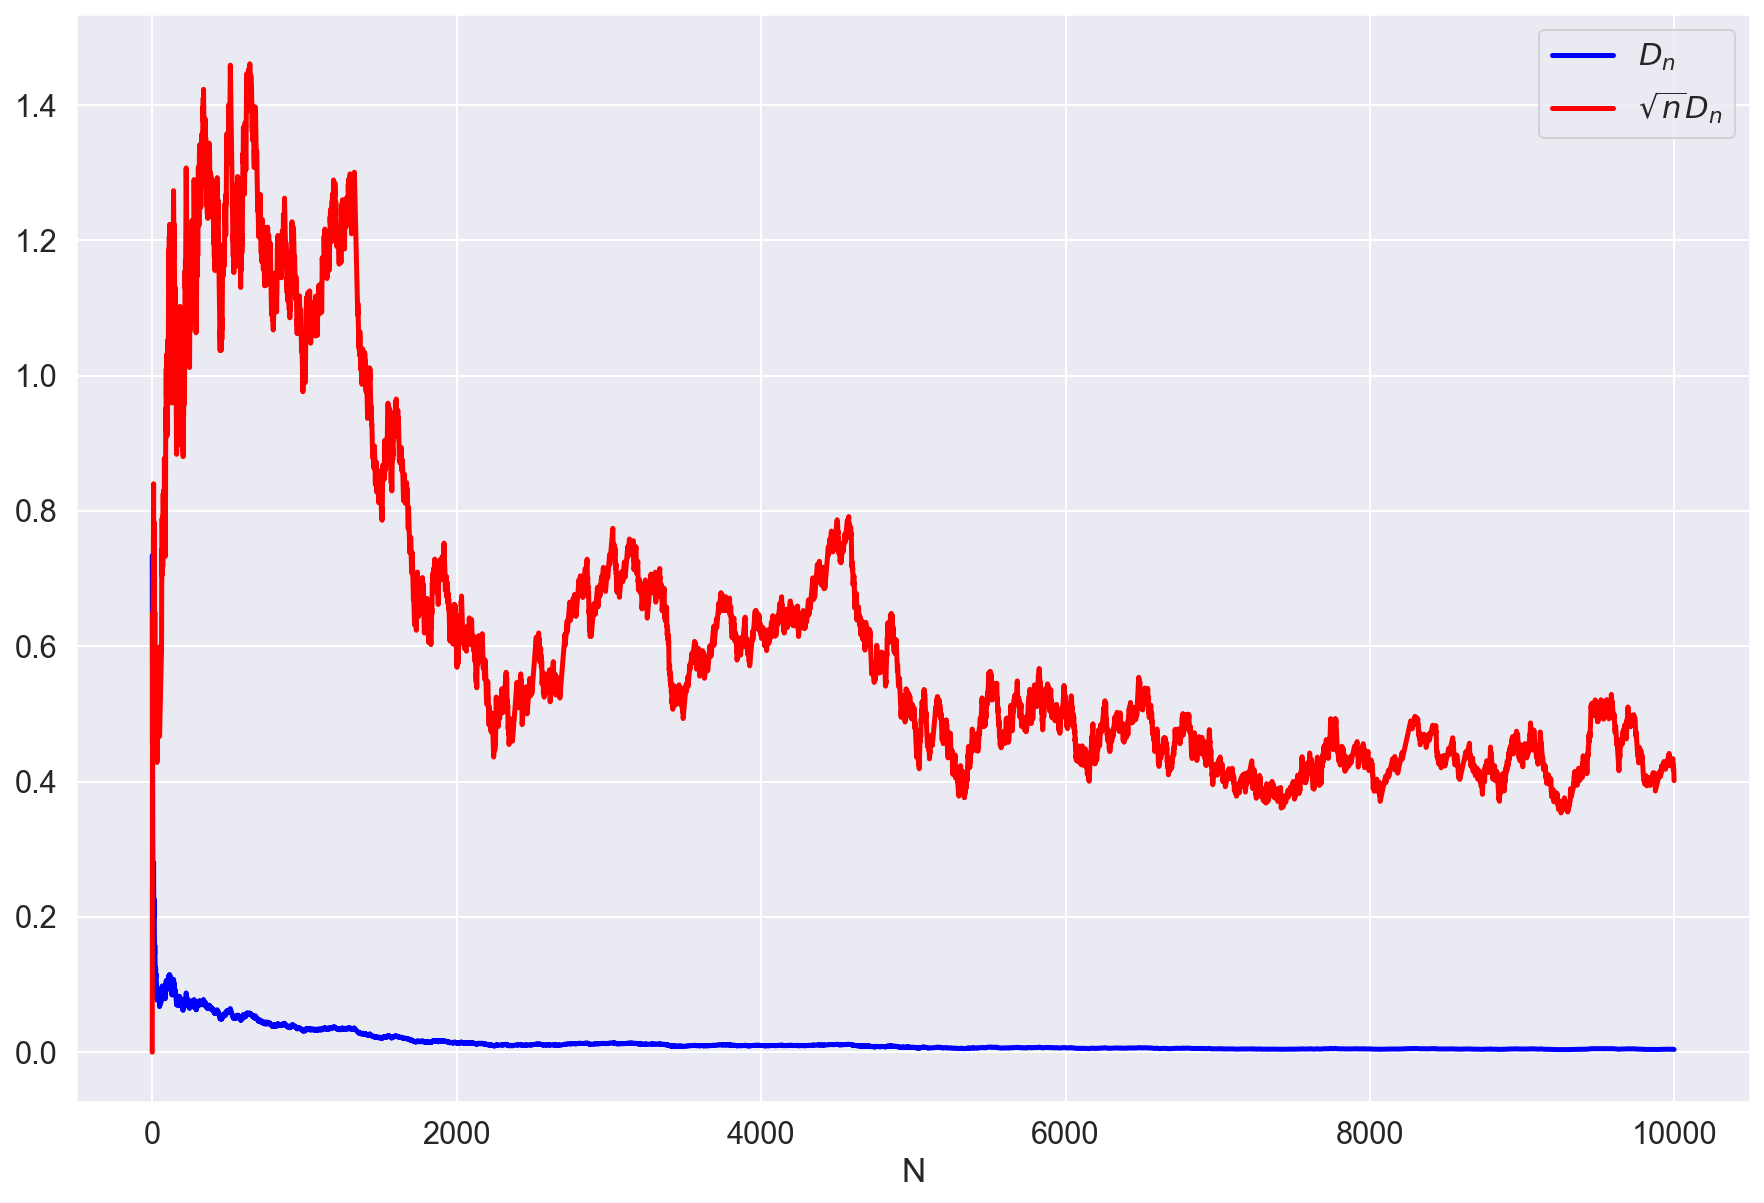

In [22]:
n = np.arange(N-1)


plt.figure(figsize=(15, 10))

plt.plot(
    n,
    D_n(n),
    linewidth=2.5,
    color='blue',
    label='$D_n$'
)

plt.plot(
    n,
    D_n(n) * np.sqrt(n),
    linewidth=2.5,
    color='red',
    label='$\sqrt{n}D_n$'
)

plt.legend()
plt.xlabel('N')

plt.show()

### Задача 4

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [23]:
theta = 1

N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

# YOUR CODE GOES HERE

samples = sps.uniform(0, theta).rvs(size=(400, 40))

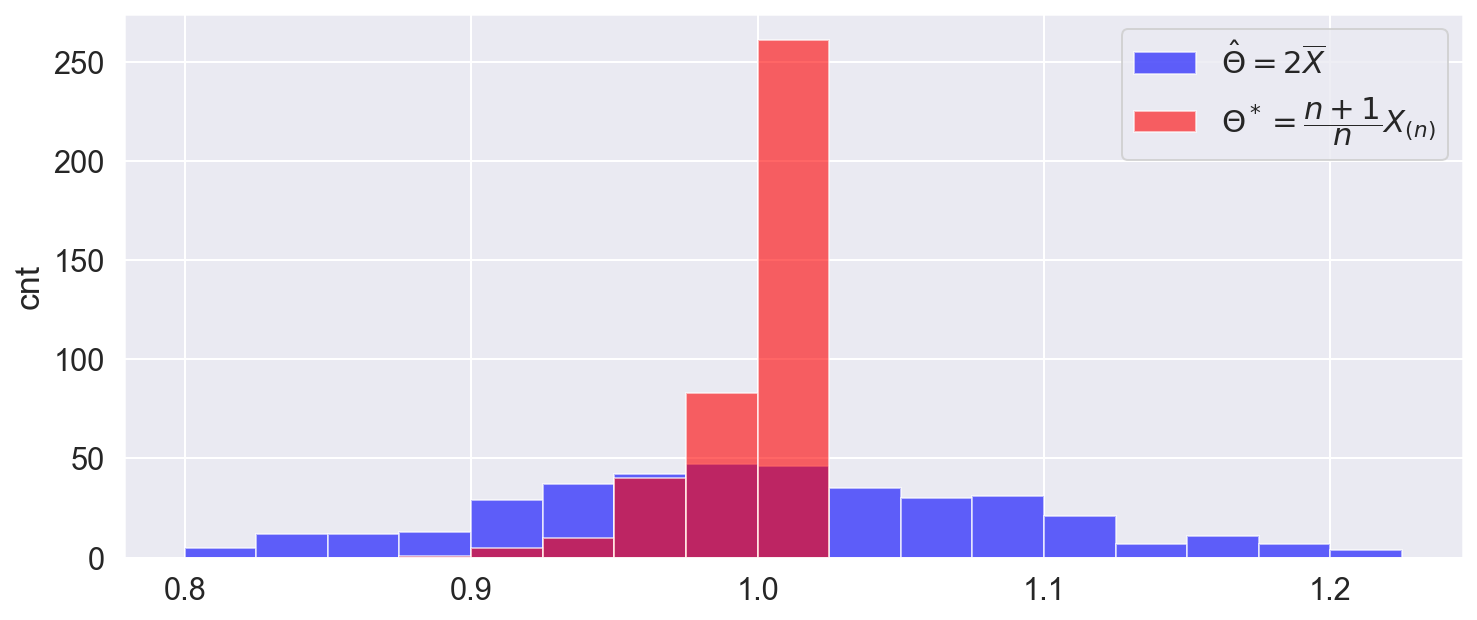

In [24]:
plt.figure(figsize=(12, 5))

hat_theta = np.array([evaluation_theta1(sample)[-1] for sample in samples])
star_theta = np.array([evaluation_theta5(sample)[-1] for sample in samples])

plt.hist(
    hat_theta,
    bins=bins,
    color='blue',
    alpha=0.6,
    label='$\hat\Theta = 2\overline{X}$'
)

plt.hist(
    star_theta,
    bins=bins,
    color='red',
    alpha=0.6,
    label='$\Theta^* = \dfrac{n+1}{n} X_{(n)}$'
)
plt.legend()
plt.ylabel('cnt')

plt.show()

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

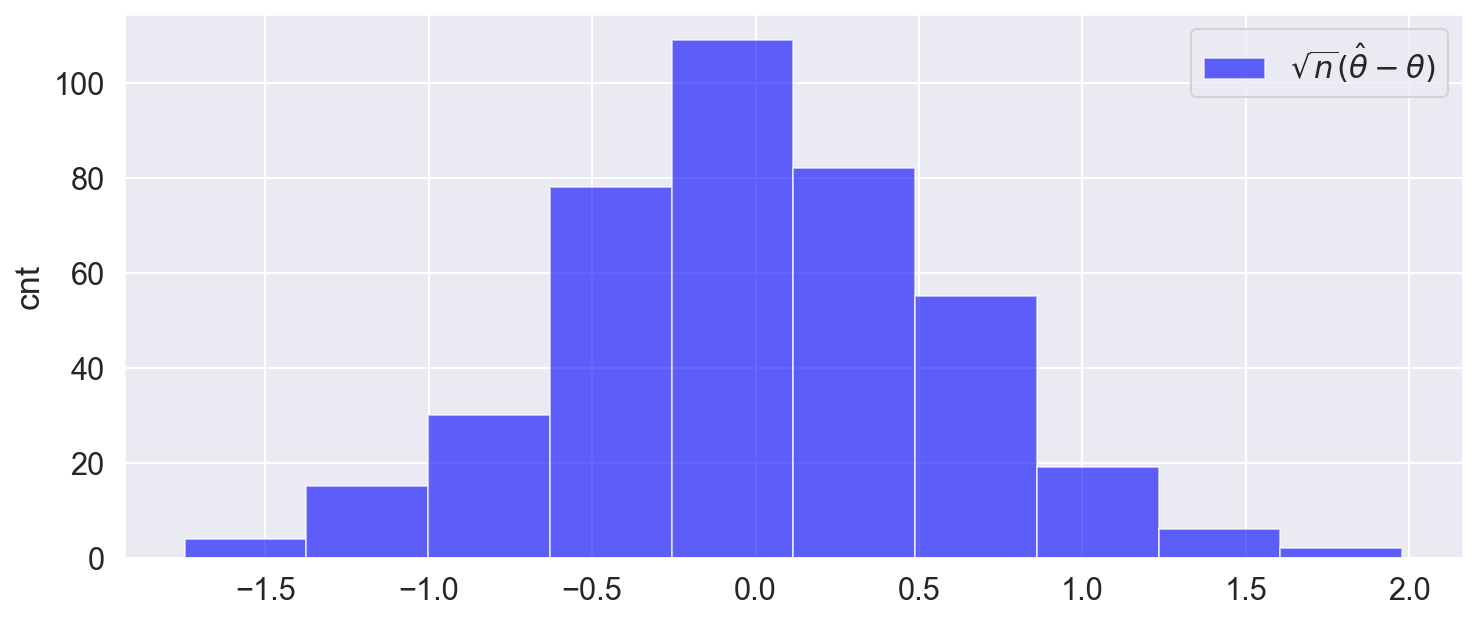

In [25]:
# YOUR CODE GOES HERE

plt.figure(figsize=(12, 5))
N = 40

plt.hist(
    np.sqrt(N) * (hat_theta - theta),
    color='blue',
    alpha=0.6,
    label='$\sqrt{n} (\hat\\theta - \\theta)$'
)


plt.legend()
plt.ylabel('cnt')

plt.show()

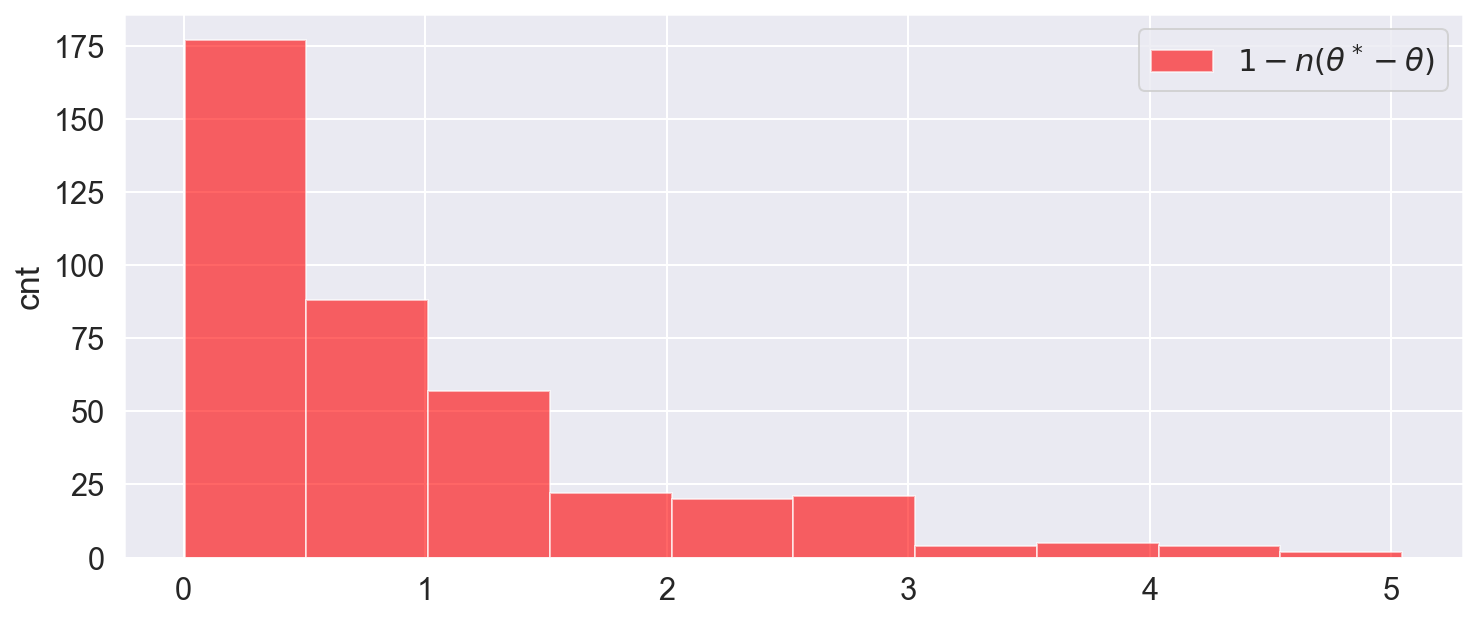

In [26]:
plt.figure(figsize=(12, 5))
N = 40

plt.hist(
    1 - N * (star_theta - theta),
    color='red',
    alpha=0.6,
    label='$1 - n  (\\theta^* - \\theta)$'
)

plt.legend()
plt.ylabel('cnt')


plt.show()

На какие распределения похожи получившиеся гистограммы?

**Ответ:**
Распределение $\sqrt{n} (\hat\theta - \theta)$ похоже на нормальное, распределение $1 - n  (\theta^* - \theta)$ похоже на экспоненциальное.

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: $\frac{\theta^2}{3}$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

In [27]:
def some_statistic(samples):
    N_samples, N = samples.shape
    return (np.sum(samples, axis=1) / N - theta) * np.sqrt(N) / (theta / np.sqrt(3))
# some_statistic(samples)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


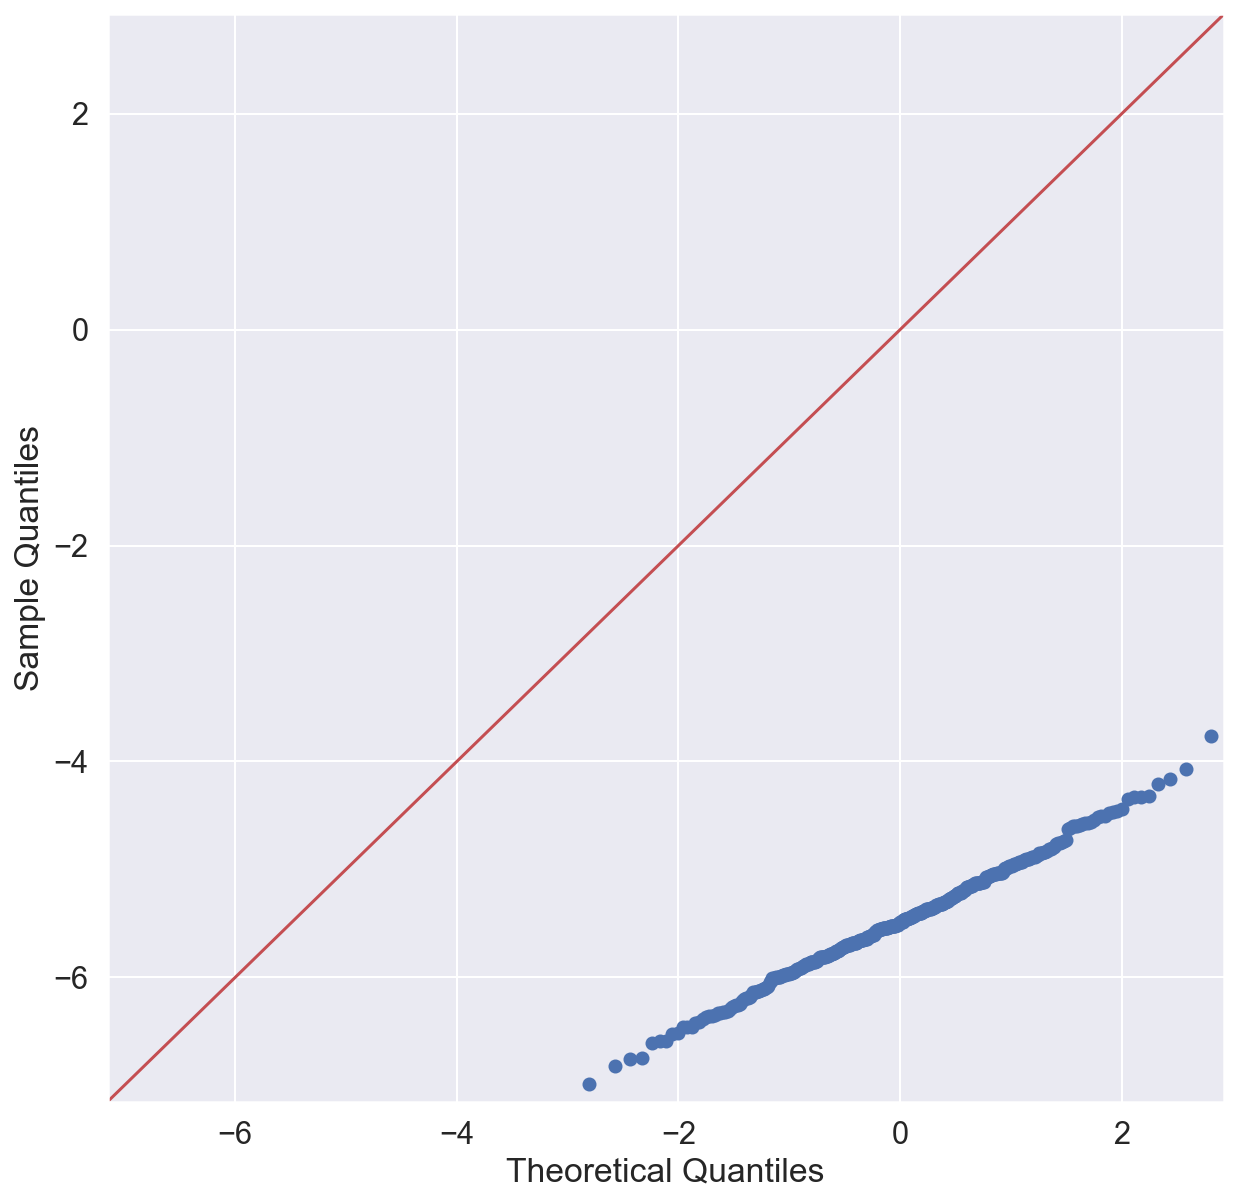

In [28]:
import statsmodels.api as sm


theta_norm = some_statistic(samples)  # YOUR CODE GOES HERE
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:**

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:**

In [29]:
def some_statistic1(samples):
    N_samples, N = samples.shape
    return theta - N * (star_theta - theta)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


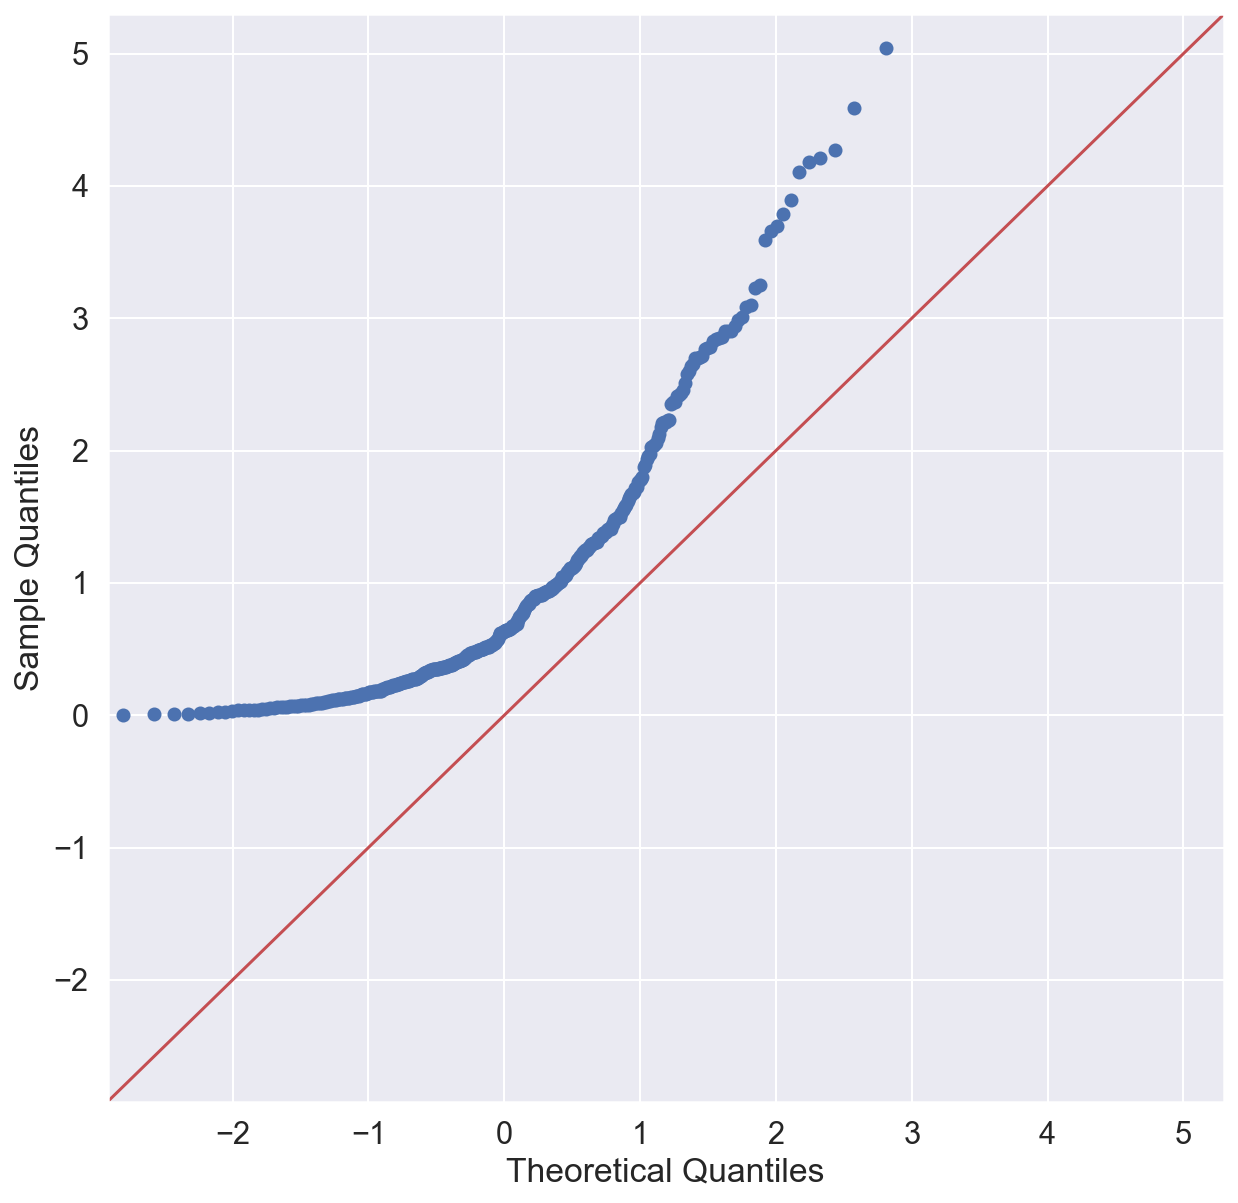

In [30]:
# YOUR CODE GOES HERE

theta_norm = some_statistic1(samples)  # YOUR CODE GOES HERE
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:**

## Важно

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.